<a href="https://colab.research.google.com/github/PoojithaKallagunta/-IIITH-Assignment/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

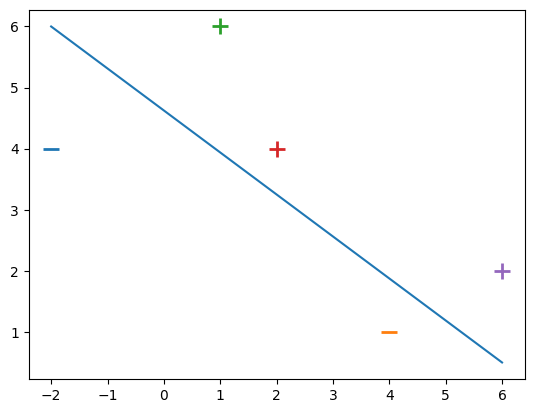

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

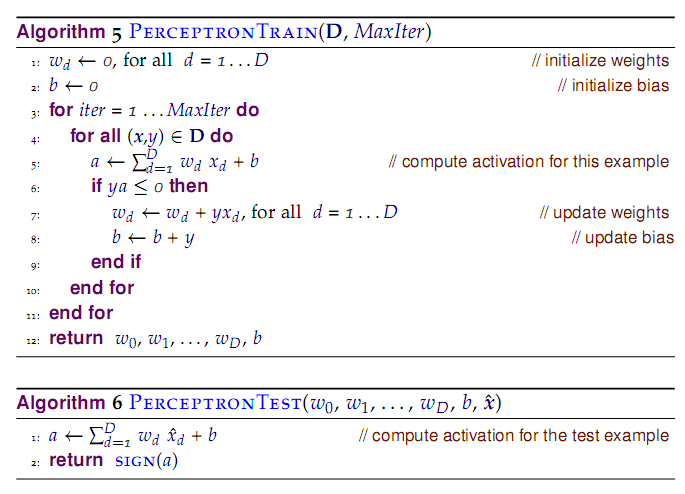

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

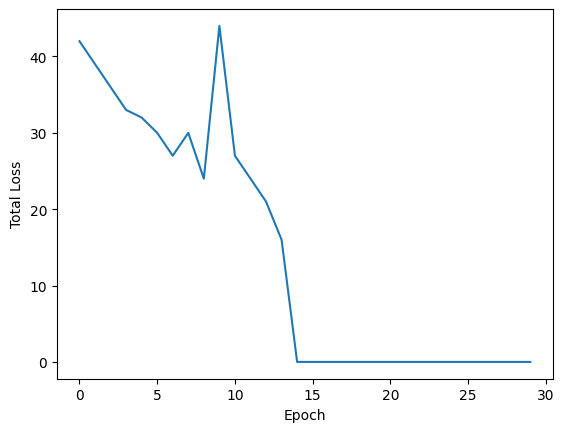

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

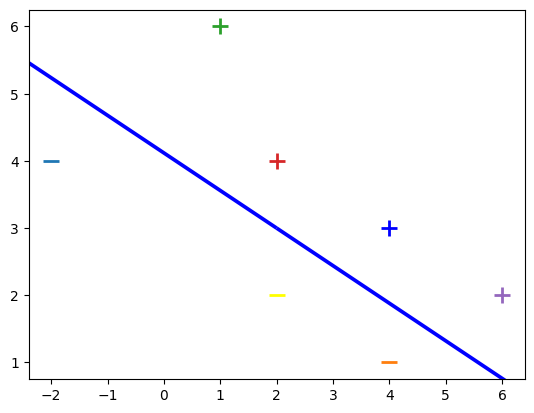

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



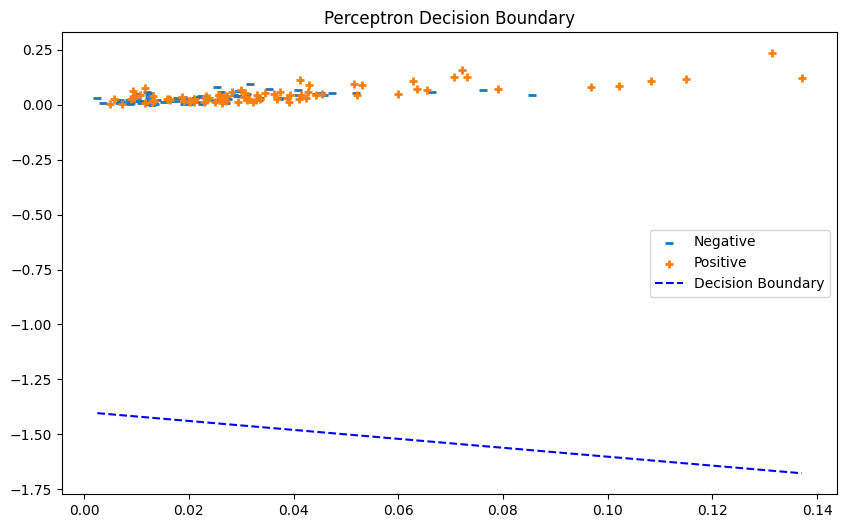

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_preprocess_data():
    data = pd.read_csv('/content/sonar_dataset.csv')
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'R', -1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def perceptron_algorithm(X, Y, epochs=10):
    w = np.zeros(X.shape[1])
    eta = 0.7

    for epoch in range(epochs):
        for x, target in zip(X, Y):
            if (np.dot(x, w) * target) <= 0:
                w += eta * x * target

    return w

def plot_decision_boundary(X, Y, w):
    plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], marker='_', label='Negative', linewidths=2)
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], marker='+', label='Positive', linewidths=2)
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(w[0] + w[1] * x_values) / w[2]
    plt.plot(x_values, y_values, color='blue', linestyle='dashed', label='Decision Boundary')
    plt.legend()
    plt.title('Perceptron Decision Boundary')
X_train, X_test, y_train, y_test = load_and_preprocess_data()
w = perceptron_algorithm(X_train, y_train, epochs=10)
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, w)
plt.show()


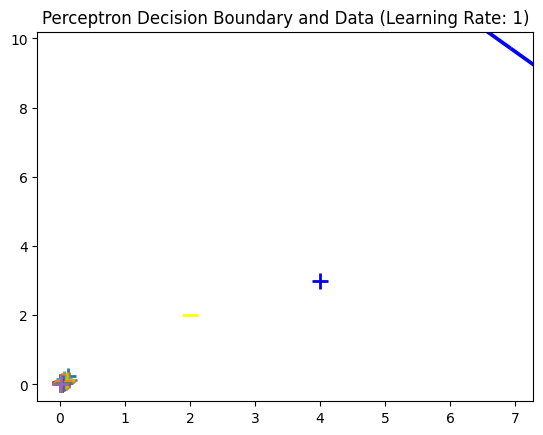

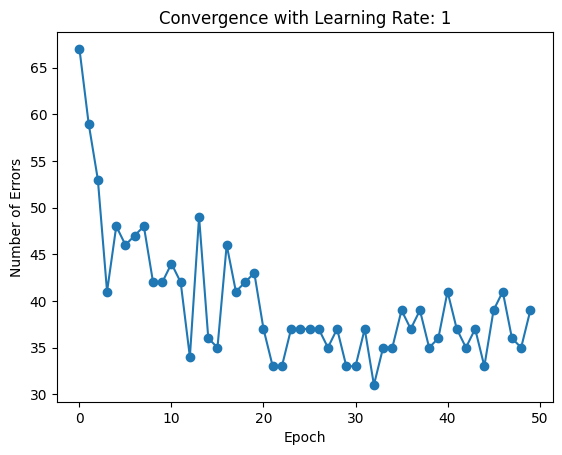

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_preprocess_data():
    data = pd.read_csv('/content/sonar_dataset.csv')
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'R', -1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def perceptron_algo(X, Y, epochs=30, eta=1):
    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        error = 0
        for x, target in zip(X, Y):
            if (np.dot(x, w) * target) <= 0:
                w += eta * x * target
                error += 1
        errors.append(error)

    return w, errors
X_train, X_test, y_train, y_test = load_and_preprocess_data()
eta = 1
w, errors = perceptron_algo(X_train, y_train, epochs=50, eta=eta)
for d, sample in enumerate(X_train):
    if y_train[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

plt.title(f'Perceptron Decision Boundary and Data (Learning Rate: {eta})')
plt.show()
plt.plot(errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title(f'Convergence with Learning Rate: {eta}')
plt.show()


ANSWERS:


2. A very large learning rate may cause the algorithm to diverge, failing to converge, while a very small learning rate may result in slow convergence due to small weight updates. On a huge learning rate the algorithm will tend to diverge.





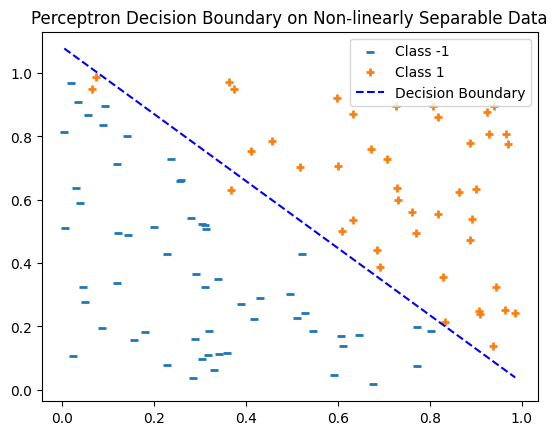

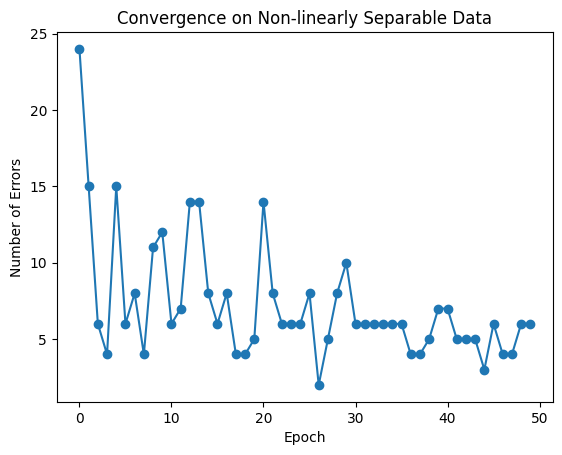

In [41]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)
def perceptron_algorithm(X, Y, epochs=10, eta=1):
    w = np.zeros(X.shape[1] + 1)
    errors = []

    for epoch in range(epochs):
        error = 0
        for x, target in zip(X, Y):
            x_with_bias = np.concatenate([[1], x])
            if (np.dot(x_with_bias, w) * target) <= 0:
                w += eta * x_with_bias * target
                error += 1
        errors.append(error)

    return w, errors
w, errors = perceptron_algorithm(X, y, epochs=50, eta=0.1)

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='_', label='Class -1', linewidths=2)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Class 1', linewidths=2)
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(w[0] + w[1] * x_values) / w[2]
plt.plot(x_values, y_values, color='blue', linestyle='dashed', label='Decision Boundary')
plt.title('Perceptron Decision Boundary on Non-linearly Separable Data')
plt.legend()
plt.show()

plt.plot(errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Convergence on Non-linearly Separable Data')
plt.show()

OBSERVATIONS:



1. The perceptron algorithm may not achieve perfect classification on a non-linearly separable dataset.
2. The decision boundary (hyperplane) may not effectively separate the classes, resulting in misclassifications.



In [31]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [32]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


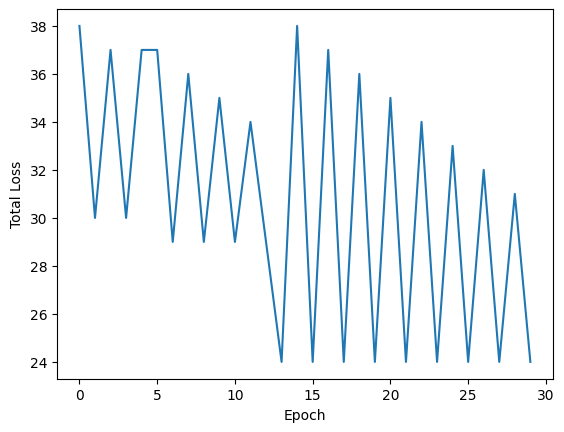

In [33]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.